<a href="https://colab.research.google.com/github/Andrian0s/ML4NLP1-2024-Tutorial-Notebooks/blob/main/ML4NLP1-2024-Tutorial-Notebooks%20/tutorials_notebooks_in_class_2024/ex1_ablation_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML4NLP1

## Minimal example for ablation study


What is an ablation study?


An ablation study investigates the performance of a system by removing certain components to understand the contribution of the component to the overall system.

In [ ]:
import pandas as pd
import numpy as np

# set seed for reproducibility
np.random.seed(42)

### Loading the datasets

In [ ]:
# download dataset
!gdown 1QP6YuwdKFNUPpvhOaAcvv2Pcp4JMbIRs # x_train
!gdown 1QVo7PZAdiZKzifK8kwhEr_umosiDCUx6 # x_test
!gdown 1QbBeKcmG2ZyAEFB3AKGTgSWQ1YEMn2jl # y_train
!gdown 1QaZj6bI7_78ymnN8IpSk4gVvg-C9fA6X # y_test

Downloading...
From: https://drive.google.com/uc?id=1QP6YuwdKFNUPpvhOaAcvv2Pcp4JMbIRs
To: /content/x_train.txt
100% 64.1M/64.1M [00:01<00:00, 49.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QVo7PZAdiZKzifK8kwhEr_umosiDCUx6
To: /content/x_test.txt
100% 65.2M/65.2M [00:00<00:00, 69.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QbBeKcmG2ZyAEFB3AKGTgSWQ1YEMn2jl
To: /content/y_train.txt
100% 480k/480k [00:00<00:00, 12.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QaZj6bI7_78ymnN8IpSk4gVvg-C9fA6X
To: /content/y_test.txt
100% 480k/480k [00:00<00:00, 20.9MB/s]


In [ ]:
with open(f'x_train.txt') as f:
    x_train = f.read().splitlines()
with open(f'y_train.txt') as f:
    y_train = f.read().splitlines()
with open(f'x_test.txt') as f:
    x_test = f.read().splitlines()
with open(f'y_test.txt') as f:
    y_test = f.read().splitlines()

In [ ]:
# Combine x_train and y_train into one dataframe
train_df = pd.DataFrame({'text': x_train, 'label': y_train})
# Write train_df to csv with tab as separator
train_df.to_csv('train_df.csv', index=False, sep='\t')
# Comibne x_test and y_test into one dataframe
test_df = pd.DataFrame({'text': x_test, 'label': y_test})
# Inspect the first 5 items in the train split
train_df.head()

,text,label
0,Klement Gottwaldi surnukeha palsameeriti ning ...,est
1,"Sebes, Joseph; Pereira Thomas (1961) (på eng)....",swe
2,भारतीय स्वातन्त्र्य आन्दोलन राष्ट्रीय एवम क्षे...,mai
3,"Après lo cort periòde d'establiment a Basilèa,...",oci
4,ถนนเจริญกรุง (อักษรโรมัน: Thanon Charoen Krung...,tha


### 1.2 Data preparation

Get a subset of the train/test data that includes 20 languages.
Include English, German, Dutch, Danish, Swedish, Norwegian, and Japanese, plus 13 additional languages of your choice based on the items in the list of labels.

In [ ]:
# Create your train/test subsets of languages
given_labels = set(['eng', 'deu', 'nld', 'dan', 'swe', 'nno', 'jpn'])

# Randomly sample 20 different target labels and create subsets of train and test dataframes with only those labels
all_labels = set(train_df['label'].unique())
target_labels = list(np.random.choice(list(all_labels - given_labels), 13, replace=False))
target_labels += given_labels
print(len(target_labels))
print(target_labels)
train_df = train_df[train_df['label'].isin(target_labels)]
test_df = test_df[test_df['label'].isin(target_labels)]

20
['bak', 'ina', 'aym', 'kat', 'mri', 'tet', 'ben', 'nap', 'slv', 'nci', 'ind', 'hau', 'fao', 'nld', 'swe', 'jpn', 'eng', 'nno', 'deu', 'dan']


In [ ]:
x_train, y_train = train_df['text'].to_numpy(), train_df['label'].to_numpy()
x_test, y_test = test_df['text'].to_numpy(), test_df['label'].to_numpy()
print(x_train[:5])
print(y_train[:5])

['Sebes, Joseph; Pereira Thomas (1961) (på eng). The Jesuits and the Sino-Russian treaty of Nerchinsk (1689): the diary of Thomas Pereira. Bibliotheca Instituti historici S. I., 99-0105377-3 ; 18. Rome. Libris 677492'
 'De spons behoort tot het geslacht Haliclona en behoort tot de familie Chalinidae. De wetenschappelijke naam van de soort werd voor het eerst geldig gepubliceerd in 1910 door Kudelin.'
 'エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運転手に頼む際、本当のことを言ってしまうと彼女が恥ずかしい思いをすると察して「僕ウンコしたいんです!!」と言ってバスを降りた。エノは内心「私もしたいみたいじゃないの」と思うも、別れ際にエノの髪を「ふわふわのお菓子みたい」と言い、この台詞に憧れていたエノに強い衝撃を与えた。この話を聞いたリコは、以後彼のことを『ウンコ王子』または『ウンコ』というあだ名で呼ぶようになったが、エノは普通に「戸田くん」と呼んでいる。'
 'シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとR&Tマーティン高校に隣接してある。1937年にマーティン高校と共に建設された。ラレド独立学区のアウトドア・アスレチックがあり、毎年ボーダー・オリンピックが開催される。通常5,000席だが、エンドゾーンに追加席を加えることで10,000席まで拡大できる。メキシコのプロ・サッカークラブがここで様々な練習試合を行い、天然芝が「良い」サッカー試合を作るとしている。フットボール、サッカーおよび陸上競技が行われる。この歴史ある競技場に大きな改修工事が計画されている。'
 'Kemunculan pertamanya adalah ketika mencium kakak kelasnya, Kyoko. Sej

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

label_encoder = LabelEncoder().fit(y_train)
y_train, y_test = label_encoder.transform(y_train), label_encoder.transform(y_test)
print(label_encoder.classes_)
print(y_train)
print(y_test)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[18 15 10 ... 17  5  3]
[15 12  9 ...  2 14  3]


In [ ]:
import string
import re
from scipy import sparse
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer

class TextNormalizer(BaseEstimator, TransformerMixin):
    """
    Custom text normalizer.
    """
    def fit(self, X, y=None):
        return self

    def _normalize_text(self, text):
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = re.sub(r'\s+', ' ', text)
        text = re.sub(r'\d+', r'NUM', text)
        text = re.sub(r'\n', r'', text)
        return text

    def transform(self, X, y=None):
        return np.array([self._normalize_text(text) for text in X])

---

### 6.1 Ablation Study

Lastly, we want to conduct a small ablation study to investigate how well our model performs under different conditions.

As a first step, choose the two languages for which the classifier worked best.

Next, re-fit the best model six times, each time reducing the **length** of each instance in the training set. To do this, create a custom `TextReducer` class that you can include as a preprocessing step in your pipeline. The class should take a `max_len` argument as a hyperparameter that can be set to train the following models:

- Model 1: `max_len = None` (i.e. no truncation!)
- Model 2: `max_len = 500`
- Model 3: `max_len = 250`
- Model 4: `max_len = 150`
- Model 5: `max_len = 100`
- Model 6: `max_len = 50`

Use average accuracy over the cross validation scores for each model to measure performance for each ablation setting.

🗒❓ How does the reduction of training data affect the performance of the classifier? And what could be some possible reasons for this?

In [ ]:
class TextReducer(BaseEstimator, TransformerMixin):
    """
    Reduces the length of input text to a specified maximum length.
    """
    def __init__(self, max_len):
        self.max_len = max_len

    def fit(self, X, y=None):
        return self

    def _reduce_text(self, text):
        """Reduce text by chars"""
        # print(f'before: {len(text)}')
        if self.max_len is not None and len(text) > self.max_len:
            text = text[:self.max_len]
            # print(f'after: {len(text)}')

        return text

    def transform(self, X, y=None):
        texts = []
        for text in X:
            texts.append(self._reduce_text(text))
        print(f'Portion of texts that are the same: {sum(1 for orig, new in zip(X, texts) if len(orig) == len(new)) / len(X)}%')
        return texts


class WordReducer(BaseEstimator, TransformerMixin):
    """
    Reduces the length of input text to a specified maximum length.
    """
    def __init__(self, max_len):
        self.max_len = max_len

    def fit(self, X, y=None):
        return self

    def _reduce_text(self, text):
        """Reduce text by words"""
        # print(f'before: {len(text)}')
        if self.max_len is not None and len(text.split()) > self.max_len:
            text = ' '.join(text.split()[:self.max_len])
            # print(f'after: {len(text)}')
        return text

    def transform(self, X, y=None):
        texts = []
        for text in X:
            texts.append(self._reduce_text(text))
        print(f'Portion of texts that are the same: {sum(1 for orig, new in zip(X, texts) if len(orig) == len(new)) / len(X)}%')
        return texts


In [ ]:
max_lens = [None, 500, 250, 150, 100, 50]
for max_len in max_lens:
    print(f'max_len: {max_len}')
    x_train_1 = TextReducer(max_len=max_len).fit_transform(x_train)
    x_train_2 = WordReducer(max_len=max_len).fit_transform(x_train)



max_len: None
Portion of texts that are the same: 1.0%
Portion of texts that are the same: 1.0%
max_len: 500
Portion of texts that are the same: 0.8148%
Portion of texts that are the same: 0.9998%
max_len: 250
Portion of texts that are the same: 0.4362%
Portion of texts that are the same: 0.9949%
max_len: 150
Portion of texts that are the same: 0.0572%
Portion of texts that are the same: 0.9696%
max_len: 100
Portion of texts that are the same: 0.0%
Portion of texts that are the same: 0.9044%
max_len: 50
Portion of texts that are the same: 0.0%
Portion of texts that are the same: 0.5939%


In [ ]:
# How does the TextReducer change the input texts?
print(x_train_1[:10])

diff = set((orig, new) for orig, new in zip(x_train, x_train_1) if len(orig) != len(new))
print(f'{len(diff) / len(x_train)}%')


['Sebes, Joseph; Pereira Thomas (1961) (på eng). The', 'De spons behoort tot het geslacht Haliclona en beh', 'エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運転手に頼', 'シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとR&Tマーティン高校に隣接し', 'Kemunculan pertamanya adalah ketika mencium kakak ', 'Indtil 1545 havde flådecheferne kunnet hyre et bet', 'Stotnik Jack Harkness, ki ga igra škotsko-ameriški', 'Tetun foufoun loos mak tetun-terik, Timór oan sira', 'Uttan iva er Steintór Rasmussen eitt tað dugnaliga', 'Helmut Schippel: Die Anfänge des Erfinderschutzes ']
0.9889%


In [ ]:
# How does the WordReducer change the input texts?
print(x_train_2[:10])

diff = set((orig, new) for orig, new in zip(x_train, x_train_2) if len(orig) != len(new))
print(f'{len(diff) / len(x_train)}%')

['Sebes, Joseph; Pereira Thomas (1961) (på eng). The Jesuits and the Sino-Russian treaty of Nerchinsk (1689): the diary of Thomas Pereira. Bibliotheca Instituti historici S. I., 99-0105377-3 ; 18. Rome. Libris 677492', 'De spons behoort tot het geslacht Haliclona en behoort tot de familie Chalinidae. De wetenschappelijke naam van de soort werd voor het eerst geldig gepubliceerd in 1910 door Kudelin.', 'エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運転手に頼む際、本当のことを言ってしまうと彼女が恥ずかしい思いをすると察して「僕ウンコしたいんです!!」と言ってバスを降りた。エノは内心「私もしたいみたいじゃないの」と思うも、別れ際にエノの髪を「ふわふわのお菓子みたい」と言い、この台詞に憧れていたエノに強い衝撃を与えた。この話を聞いたリコは、以後彼のことを『ウンコ王子』または『ウンコ』というあだ名で呼ぶようになったが、エノは普通に「戸田くん」と呼んでいる。', 'シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとR&Tマーティン高校に隣接してある。1937年にマーティン高校と共に建設された。ラレド独立学区のアウトドア・アスレチックがあり、毎年ボーダー・オリンピックが開催される。通常5,000席だが、エンドゾーンに追加席を加えることで10,000席まで拡大できる。メキシコのプロ・サッカークラブがここで様々な練習試合を行い、天然芝が「良い」サッカー試合を作るとしている。フットボール、サッカーおよび陸上競技が行われる。この歴史ある競技場に大きな改修工事が計画されている。', 'Kemunculan pertamanya adalah ketika mencium kakak kelasnya, Kyoko. Sej

Running experiment for max_len: None
Portion of texts that are the same: 1.0%
Portion of texts that are the same: 1.0%
Portion of texts that are the same: 1.0%
Portion of texts that are the same: 1.0%
Portion of texts that are the same: 1.0%
Portion of texts that are the same: 1.0%
max_len: None, avg acc: 0.971, std: 0.002
Running experiment for max_len: 500
Portion of texts that are the same: 0.8154815481548154%
Portion of texts that are the same: 0.8134373125374925%
Portion of texts that are the same: 0.815959202039898%
Portion of texts that are the same: 0.8124812481248125%
Portion of texts that are the same: 0.8129593520323983%
Portion of texts that are the same: 0.8184818481848185%
max_len: 500, avg acc: 0.971, std: 0.002
Running experiment for max_len: 250
Portion of texts that are the same: 0.4351935193519352%
Portion of texts that are the same: 0.4382123575284943%
Portion of texts that are the same: 0.4373781310934453%
Portion of texts that are the same: 0.43384338433843384%
Po

<Axes: xlabel='max_len'>

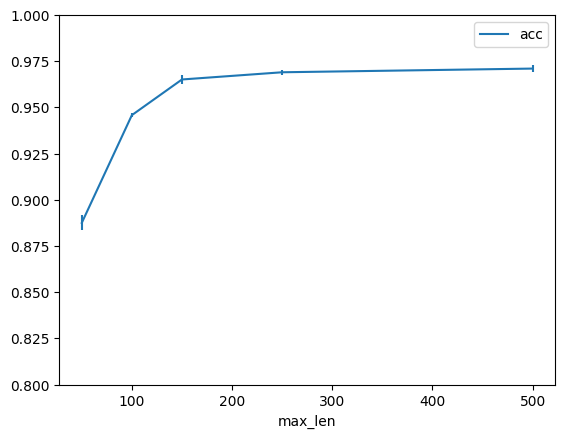

In [ ]:
max_lens = [None, 500, 250, 150, 100, 50]
acc_means = []
acc_stds = []
cv = 3

# For-loop to run through the ablation settings
for max_len in max_lens:
    print(f'Running experiment for max_len: {max_len}')
    abl_pipe = Pipeline([
        ('TextReducer', TextReducer(max_len=max_len)),
        ('normalizer', TextNormalizer()),
        ('vectorizer', TfidfVectorizer(lowercase=False, analyzer='char_wb', ngram_range=(3,6), max_features=1000, smooth_idf=True)),
        ('clf', LogisticRegression())
    ])
    abl_cross_validations = cross_val_score(abl_pipe, x_train, y_train, scoring='accuracy', cv=cv)
    mean_acc = np.mean(abl_cross_validations)
    std_acc = np.std(abl_cross_validations)
    acc_means.append(mean_acc)
    acc_stds.append(std_acc)
    print(f'max_len: {max_len}, avg acc: {mean_acc:.3f}, std: {std_acc:.3f}')

# Put the results into a dataframe
results = pd.DataFrame({'max_len': max_lens, 'acc': acc_means, 'std': acc_stds})
results.plot(x='max_len', y='acc', yerr='std', kind='line', ylim=(0.8, 1.0))

Running experiment for max_len: None
Portion of texts that are the same: 1.0%
Portion of texts that are the same: 1.0%
Portion of texts that are the same: 1.0%
Portion of texts that are the same: 1.0%
Portion of texts that are the same: 1.0%
Portion of texts that are the same: 1.0%
max_len: None, avg acc: 0.971, std: 0.002
Running experiment for max_len: 500
Portion of texts that are the same: 0.9996999699969997%
Portion of texts that are the same: 1.0%
Portion of texts that are the same: 0.999850007499625%
Portion of texts that are the same: 0.9996999699969997%
Portion of texts that are the same: 0.999850007499625%
Portion of texts that are the same: 0.9996999699969997%
max_len: 500, avg acc: 0.971, std: 0.002
Running experiment for max_len: 250
Portion of texts that are the same: 0.995049504950495%
Portion of texts that are the same: 0.9946010797840432%
Portion of texts that are the same: 0.9944502774861257%
Portion of texts that are the same: 0.9957995799579958%
Portion of texts tha

<Axes: xlabel='max_len'>

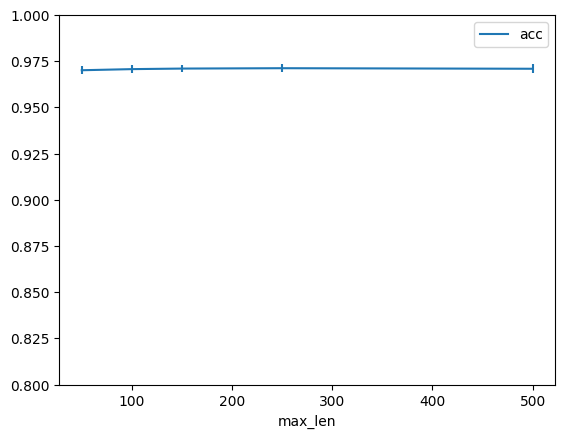

In [ ]:
# For-loop to run through the ablation settings
max_lens = [None, 500, 250, 150, 100, 50]
acc_means = []
acc_stds = []
cv = 3

for max_len in max_lens:
    print(f'Running experiment for max_len: {max_len}')
    abl_pipe = Pipeline([
        ('TextReducer', WordReducer(max_len=max_len)),
        ('normalizer', TextNormalizer()),
        ('vectorizer', TfidfVectorizer(lowercase=False, analyzer='char_wb', ngram_range=(3,6), max_features=1000, smooth_idf=True)),
        ('clf', LogisticRegression(penalty='l2', solver='saga'))
    ])
    abl_cross_validations = cross_val_score(abl_pipe, x_train, y_train, scoring='accuracy', cv=cv)
    mean_acc = np.mean(abl_cross_validations)
    std_acc = np.std(abl_cross_validations)
    acc_means.append(mean_acc)
    acc_stds.append(std_acc)
    print(f'max_len: {max_len}, avg acc: {mean_acc:.3f}, std: {std_acc:.3f}')

# Put the results into a dataframe
results = pd.DataFrame({'max_len': max_lens, 'acc': acc_means, 'std': acc_stds})
results.plot(x='max_len', y='acc', yerr='std', kind='line', ylim=(0.8, 1.0))